### Tweets Labels - Exploratory Data Analysis

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#### Mergins all datasets together

In [0]:
def create_df(file):
  df = pd.read_csv(file)
  return df

In [0]:
df1 = create_df('/content/drive/My Drive/tweets/data1_dvtweets.csv')
df2 = create_df('/content/drive/My Drive/tweets/data2_dvtweets.csv')
df3 = create_df('/content/drive/My Drive/tweets/data3_dvtweets.csv')
df4 = create_df('/content/drive/My Drive/tweets/data4_dvtweets.csv')
df5 = create_df('/content/drive/My Drive/tweets/data5_dvtweets.csv')
df6 = create_df('/content/drive/My Drive/tweets/data6_dvtweets.csv')
df7 = create_df('/content/drive/My Drive/tweets/data8_dvtweets.csv')
df8 = create_df('/content/drive/My Drive/tweets/labeled.csv')
df9 = create_df('/content/drive/My Drive/tweets/labeled2.csv')
df10 = pd.read_excel('/content/drive/My Drive/tweets/labeled.xlsx')

In [47]:
dfs = [df1, df2, df3, df4, df5,df6,df7,df8,df9,df10]
df = pd.DataFrame({})
for frame in dfs:
  df = pd.concat([df,frame])

df

,username,to,text,retweets,favorites,replies,id_x,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls,user_location,month,processed_text,label,annotations,annotation_approver,lab_final,tweet_id
0,VipinHeartsTay,NaN,The fact their might be so many marital rape a...,0,10,1,1.255927e+18,https://twitter.com/VipinHeartsTay/status/1255...,2875165356,2020-04-30 18:28:25+00:00,Thu Apr 30 18:28:25 +0000 2020,NaN,NaN,NaN,NaN,India,4,fact might many marital rape sexual assault wi...,DV,"[{'label': 24, 'user': 1}]",admin,DV_OPINION_ADVOCATE,NaN
1,TheGhoudi,NaN,"‘If the child has been through sexual abuse, a...",2,3,1,1.255806e+18,https://twitter.com/TheGhoudi/status/125580574...,822838819359690754,2020-04-30 10:26:35+00:00,Thu Apr 30 10:26:35 +0000 2020,NaN,@TanujaSodhi,NaN,NaN,"Mumbai, India",4,"‘if child sexual abuse, adults/parents give ch...",DV,"[{'label': 31, 'user': 6}]",admin,NON_D_VIOLENCE_ABOUT,NaN
2,TheGhoudi,NaN,‘If you have any doubt & pick up any signs of ...,0,6,1,1.255803e+18,https://twitter.com/TheGhoudi/status/125580265...,822838819359690754,2020-04-30 10:14:19+00:00,Thu Apr 30 10:14:19 +0000 2020,#ChildrenAndCovid19,@Arpan_CSA,NaN,https://bit.ly/preventingCSA_lockdown,"Mumbai, India",4,"‘if doubt & pick sign sexual abuse child, make...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN
3,iamwanderlas,NaN,"FUCCBOIS 8/10: a great film and yeah, it talks...",0,2,1,1.255749e+18,https://twitter.com/iamwanderlas/status/125574...,849866014825209856,2020-04-30 06:42:54+00:00,Thu Apr 30 06:42:54 +0000 2020,NaN,NaN,NaN,NaN,Lost,4,"fuccbois 8/10: great film yeah, talks politics...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN
4,livevideohotcha,NaN,#Lockdown New Time Zone for #Sexual Couples......,0,2,2,1.255718e+18,https://twitter.com/livevideohotcha/status/125...,1228690520907689985,2020-04-30 04:36:16+00:00,Thu Apr 30 04:36:16 +0000 2020,#Lockdown #Sexual,NaN,NaN,NaN,"Mumbai, India",4,#lockdown new time zone #sexual couples...,DV,"[{'label': 34, 'user': 1}]",admin,NO_VIOLENCE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,hellionwolf,smolbean_kang,"Listen, your own issues with sexuality don't m...",0,0,1,NaN,https://twitter.com/hellionwolf/status/1261998...,2951225644,2020-05-17 12:34:32+00:00,Sun May 17 12:34:32 +0000 2020,NaN,NaN,NaN,NaN,Ldn,5,"listen, issue sexuality mean get project. okay...",DV,"[{'label': 168, 'user': 18}]",admin,NO_VIOLENCE,1.261999e+18
1255,AmnaHas96596596,PhilMitchell83,Intentionally denying that women make up major...,0,1,1,NaN,https://twitter.com/AmnaHas96596596/status/126...,1168675390887477250,2020-05-17 12:33:08+00:00,Sun May 17 12:33:08 +0000 2020,NaN,NaN,NaN,NaN,"Karachi, Pakistan",5,intentionally deny woman make majority rape/se...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261998e+18
1256,TheKailashRao,NaN,BJP leader @iSinghApurva said that the support...,2,2,0,NaN,https://twitter.com/TheKailashRao/status/12619...,1227687231663378432,2020-05-17 12:30:20+00:00,Sun May 17 12:30:20 +0000 2020,#JusticeForApurva,@iSinghApurva,NaN,https://www.opindia.com/2020/05/bjp-youth-lead...,"Alwar, Rajasthan",5,bjp leader @isinghapurva say supporter opposit...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261997e+18
1257,AyushjhaJha,NaN,@Uppolice this FB page regularly posts video o...,0,0,0,NaN,https://twitter.com/AyushjhaJha/status/1261996...,365441846,2020-05-17 12:27:42+00:00,Sun May 17 12:27:42 +0000 2020,NaN,@Uppolice @swati_gs @UnSubtleDesi @smitaprakas...,NaN,https://m.facebook.com/luchchaveer/,"Samastipur, Bihar, India",5,@uppolice fb page regularly post video eve tea...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261997e+18


In [0]:
df = df.reset_index()

In [49]:
df

,index,username,to,text,retweets,favorites,replies,id_x,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls,user_location,month,processed_text,label,annotations,annotation_approver,lab_final,tweet_id
0,0,VipinHeartsTay,NaN,The fact their might be so many marital rape a...,0,10,1,1.255927e+18,https://twitter.com/VipinHeartsTay/status/1255...,2875165356,2020-04-30 18:28:25+00:00,Thu Apr 30 18:28:25 +0000 2020,NaN,NaN,NaN,NaN,India,4,fact might many marital rape sexual assault wi...,DV,"[{'label': 24, 'user': 1}]",admin,DV_OPINION_ADVOCATE,NaN
1,1,TheGhoudi,NaN,"‘If the child has been through sexual abuse, a...",2,3,1,1.255806e+18,https://twitter.com/TheGhoudi/status/125580574...,822838819359690754,2020-04-30 10:26:35+00:00,Thu Apr 30 10:26:35 +0000 2020,NaN,@TanujaSodhi,NaN,NaN,"Mumbai, India",4,"‘if child sexual abuse, adults/parents give ch...",DV,"[{'label': 31, 'user': 6}]",admin,NON_D_VIOLENCE_ABOUT,NaN
2,2,TheGhoudi,NaN,‘If you have any doubt & pick up any signs of ...,0,6,1,1.255803e+18,https://twitter.com/TheGhoudi/status/125580265...,822838819359690754,2020-04-30 10:14:19+00:00,Thu Apr 30 10:14:19 +0000 2020,#ChildrenAndCovid19,@Arpan_CSA,NaN,https://bit.ly/preventingCSA_lockdown,"Mumbai, India",4,"‘if doubt & pick sign sexual abuse child, make...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN
3,3,iamwanderlas,NaN,"FUCCBOIS 8/10: a great film and yeah, it talks...",0,2,1,1.255749e+18,https://twitter.com/iamwanderlas/status/125574...,849866014825209856,2020-04-30 06:42:54+00:00,Thu Apr 30 06:42:54 +0000 2020,NaN,NaN,NaN,NaN,Lost,4,"fuccbois 8/10: great film yeah, talks politics...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN
4,4,livevideohotcha,NaN,#Lockdown New Time Zone for #Sexual Couples......,0,2,2,1.255718e+18,https://twitter.com/livevideohotcha/status/125...,1228690520907689985,2020-04-30 04:36:16+00:00,Thu Apr 30 04:36:16 +0000 2020,#Lockdown #Sexual,NaN,NaN,NaN,"Mumbai, India",4,#lockdown new time zone #sexual couples...,DV,"[{'label': 34, 'user': 1}]",admin,NO_VIOLENCE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,1254,hellionwolf,smolbean_kang,"Listen, your own issues with sexuality don't m...",0,0,1,NaN,https://twitter.com/hellionwolf/status/1261998...,2951225644,2020-05-17 12:34:32+00:00,Sun May 17 12:34:32 +0000 2020,NaN,NaN,NaN,NaN,Ldn,5,"listen, issue sexuality mean get project. okay...",DV,"[{'label': 168, 'user': 18}]",admin,NO_VIOLENCE,1.261999e+18
6078,1255,AmnaHas96596596,PhilMitchell83,Intentionally denying that women make up major...,0,1,1,NaN,https://twitter.com/AmnaHas96596596/status/126...,1168675390887477250,2020-05-17 12:33:08+00:00,Sun May 17 12:33:08 +0000 2020,NaN,NaN,NaN,NaN,"Karachi, Pakistan",5,intentionally deny woman make majority rape/se...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261998e+18
6079,1256,TheKailashRao,NaN,BJP leader @iSinghApurva said that the support...,2,2,0,NaN,https://twitter.com/TheKailashRao/status/12619...,1227687231663378432,2020-05-17 12:30:20+00:00,Sun May 17 12:30:20 +0000 2020,#JusticeForApurva,@iSinghApurva,NaN,https://www.opindia.com/2020/05/bjp-youth-lead...,"Alwar, Rajasthan",5,bjp leader @isinghapurva say supporter opposit...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261997e+18
6080,1257,AyushjhaJha,NaN,@Uppolice this FB page regularly posts video o...,0,0,0,NaN,https://twitter.com/AyushjhaJha/status/1261996...,365441846,2020-05-17 12:27:42+00:00,Sun May 17 12:27:42 +0000 2020,NaN,@Uppolice @swati_gs @UnSubtleDesi @smitaprakas...,NaN,https://m.facebook.com/luchchaveer/,"Samastipur, Bihar, India",5,@uppolice fb page regularly post video eve tea...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261997e+18


In [0]:
dates = []
for date in df['date'].str.split(' '):
  parsed_date = dt.datetime.strptime(date[0], '%Y-%m-%d')
  dates.append(parsed_date)

date = pd.Series(dates)
df['date'] = date

#### Getting Location

In [51]:
df['user_location'].value_counts()

Pakistan                 406
India                    325
New Delhi, India         184
Mumbai, India            180
Lahore, Pakistan         154
                        ... 
ATX 🛩IE                    1
Pyongyang North Korea      1
KL                         1
Islamabad🇵🇰                1
Philippines 🇵🇭             1
Name: user_location, Length: 666, dtype: int64

In [0]:
df['india'] = df['user_location'].str.contains('India|india', regex = True)

In [0]:
cities = df[df['india'] == True]['user_location']

In [0]:
india_cities = []

for location in cities:
  location = location.split(',')[0]
  city = ''
  if location == 'India' or location == 'india' or location == 'India 🇮🇳':
    city = 'Unknown'
  else:
    city = location 
  india_cities.append(city)

df['india'] = pd.Series(india_cities) 

In [0]:
df['pakistan'] = df['user_location'].str.contains('Pakistan|pakistan', regex = True)

In [0]:
pakistan_cities = df[df['pakistan'] == True]['user_location']

In [0]:
pakistan_city = []
for location in pakistan_cities:
  location = location.split(',')[0]
  city = ''
  if location == 'Pakistan' or location == 'Pakistan Canada':
    city = 'Unkown'
  else:
    city = location
  pakistan_city.append(city)
df['pakistan'] = pd.Series(pakistan_city)

In [0]:
df = df.set_index('date')

In [59]:
df['lab_final'].value_counts()

NON_D_VIOLENCE_ABOUT       3748
NO_VIOLENCE                1302
NON_D_VIOLENCE_DIRECTED     608
DV_OPINION_ADVOCATE         192
DV_OPINION_INFO_NEWS         94
DV_STORY                     58
DV_OPINION_NEWS_INFO         40
UNKNOWN                      24
DV_OPINION_DENIER            16
Name: lab_final, dtype: int64

### EDA

In [60]:
df

,index,username,to,text,retweets,favorites,replies,id_x,permalink,author_id,formatted_date,hashtags,mentions,geo,urls,user_location,month,processed_text,label,annotations,annotation_approver,lab_final,tweet_id,india,pakistan
date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-30,0,VipinHeartsTay,NaN,The fact their might be so many marital rape a...,0,10,1,1.255927e+18,https://twitter.com/VipinHeartsTay/status/1255...,2875165356,Thu Apr 30 18:28:25 +0000 2020,NaN,NaN,NaN,NaN,India,4,fact might many marital rape sexual assault wi...,DV,"[{'label': 24, 'user': 1}]",admin,DV_OPINION_ADVOCATE,NaN,Unknown,Unkown
2020-04-30,1,TheGhoudi,NaN,"‘If the child has been through sexual abuse, a...",2,3,1,1.255806e+18,https://twitter.com/TheGhoudi/status/125580574...,822838819359690754,Thu Apr 30 10:26:35 +0000 2020,NaN,@TanujaSodhi,NaN,NaN,"Mumbai, India",4,"‘if child sexual abuse, adults/parents give ch...",DV,"[{'label': 31, 'user': 6}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Mumbai,Panjgur Balochistan Pakistan
2020-04-30,2,TheGhoudi,NaN,‘If you have any doubt & pick up any signs of ...,0,6,1,1.255803e+18,https://twitter.com/TheGhoudi/status/125580265...,822838819359690754,Thu Apr 30 10:14:19 +0000 2020,#ChildrenAndCovid19,@Arpan_CSA,NaN,https://bit.ly/preventingCSA_lockdown,"Mumbai, India",4,"‘if doubt & pick sign sexual abuse child, make...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Mumbai,Karachi
2020-04-30,3,iamwanderlas,NaN,"FUCCBOIS 8/10: a great film and yeah, it talks...",0,2,1,1.255749e+18,https://twitter.com/iamwanderlas/status/125574...,849866014825209856,Thu Apr 30 06:42:54 +0000 2020,NaN,NaN,NaN,NaN,Lost,4,"fuccbois 8/10: great film yeah, talks politics...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Mumbai,Karachi
2020-04-30,4,livevideohotcha,NaN,#Lockdown New Time Zone for #Sexual Couples......,0,2,2,1.255718e+18,https://twitter.com/livevideohotcha/status/125...,1228690520907689985,Thu Apr 30 04:36:16 +0000 2020,#Lockdown #Sexual,NaN,NaN,NaN,"Mumbai, India",4,#lockdown new time zone #sexual couples...,DV,"[{'label': 34, 'user': 1}]",admin,NO_VIOLENCE,NaN,New Delhi,Karachi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17,1254,hellionwolf,smolbean_kang,"Listen, your own issues with sexuality don't m...",0,0,1,NaN,https://twitter.com/hellionwolf/status/1261998...,2951225644,Sun May 17 12:34:32 +0000 2020,NaN,NaN,NaN,NaN,Ldn,5,"listen, issue sexuality mean get project. okay...",DV,"[{'label': 168, 'user': 18}]",admin,NO_VIOLENCE,1.261999e+18,NaN,NaN
2020-05-17,1255,AmnaHas96596596,PhilMitchell83,Intentionally denying that women make up major...,0,1,1,NaN,https://twitter.com/AmnaHas96596596/status/126...,1168675390887477250,Sun May 17 12:33:08 +0000 2020,NaN,NaN,NaN,NaN,"Karachi, Pakistan",5,intentionally deny woman make majority rape/se...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261998e+18,NaN,NaN
2020-05-17,1256,TheKailashRao,NaN,BJP leader @iSinghApurva said that the support...,2,2,0,NaN,https://twitter.com/TheKailashRao/status/12619...,1227687231663378432,Sun May 17 12:30:20 +0000 2020,#JusticeForApurva,@iSinghApurva,NaN,https://www.opindia.com/2020/05/bjp-youth-lead...,"Alwar, Rajasthan",5,bjp leader @isinghapurva say supporter opposit...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261997e+18,NaN,NaN


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
dummies = pd.get_dummies(df['lab_final'])
df = pd.concat([df, dummies], axis =1)

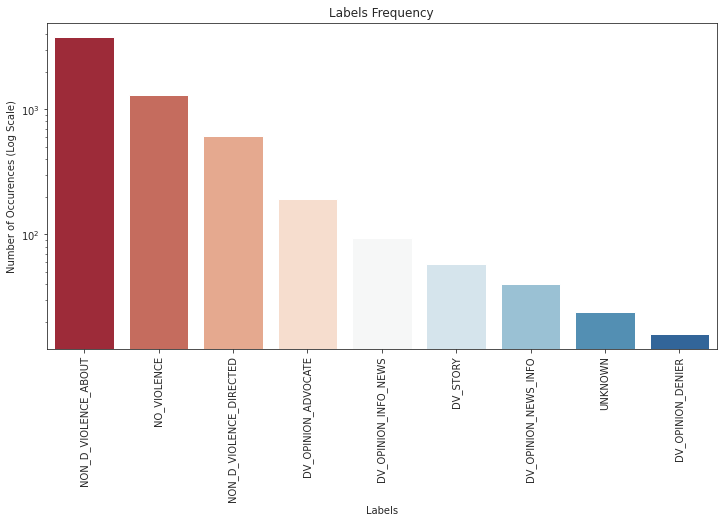

In [63]:

plt.figure(figsize = (12,6))
sns.set_palette("Blues")
sns.set_style('ticks')
chart = sns.countplot(x = 'lab_final', data = df, palette = 'RdBu', order = df['lab_final'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_yscale('log')
chart.set_xlabel('Labels')
chart.set_ylabel('Number of Occurences (Log Scale)')
chart.set_title('Labels Frequency')
plt.show()

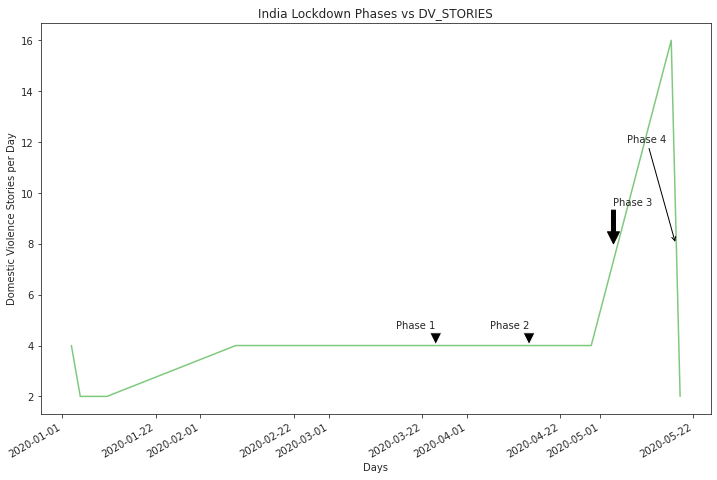

In [64]:
dv_stories = df[df['lab_final'] == 'DV_STORY'].index
dv_stories_dv = df[df['lab_final'] == 'DV_STORY']['lab_final']
fig, ax = plt.subplots()
dv_stories_dv.index.value_counts().plot(kind = 'line',colormap = 'Accent', ax = ax, figsize = (12,8))
ax.annotate('Phase 1', xy = [pd.Timestamp('2020-03-25'), 4],
            xytext = (pd.Timestamp('2020-03-25'), 5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax.annotate('Phase 2', xy = [pd.Timestamp('2020-04-15'), 4],
            xytext = (pd.Timestamp('2020-04-15'), 5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax.annotate('Phase 3', xy = [pd.Timestamp('2020-05-04'),8],
            xytext = (pd.Timestamp('2020-05-04'), 9.5),
            arrowprops= {"color": 'black'})

ax.annotate('Phase 4', xy = [pd.Timestamp('2020-05-18'),8],
            xytext = (pd.Timestamp('2020-05-07'), 12),
            arrowprops= {"arrowstyle": '->', "color": 'black'})

ax.set_title('India Lockdown Phases vs DV_STORIES')
ax.set_ylabel('Domestic Violence Stories per Day')
ax.set_xlabel('Days')
plt.show()

In [65]:
df['lab_final'].value_counts()

NON_D_VIOLENCE_ABOUT       3748
NO_VIOLENCE                1302
NON_D_VIOLENCE_DIRECTED     608
DV_OPINION_ADVOCATE         192
DV_OPINION_INFO_NEWS         94
DV_STORY                     58
DV_OPINION_NEWS_INFO         40
UNKNOWN                      24
DV_OPINION_DENIER            16
Name: lab_final, dtype: int64

In [0]:
df['lab_final'] = df['lab_final'].str.replace('DV_OPINION_NEWS_INFO', 'DV_OPINION_INFO_NEWS')

In [67]:
labels_by_city = df[(df['lab_final'] != 'UNKNOWN') & (df['lab_final'] != 'NO_VIOLENCE') & (df['lab_final'] != 'DV_OPINION_DENIER') & (df['india'] != 'Unknown')]
labels_by_city

,index,username,to,text,retweets,favorites,replies,id_x,permalink,author_id,formatted_date,hashtags,mentions,geo,urls,user_location,month,processed_text,label,annotations,annotation_approver,lab_final,tweet_id,india,pakistan,DV_OPINION_ADVOCATE,DV_OPINION_DENIER,DV_OPINION_INFO_NEWS,DV_OPINION_NEWS_INFO,DV_STORY,NON_D_VIOLENCE_ABOUT,NON_D_VIOLENCE_DIRECTED,NO_VIOLENCE,UNKNOWN
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-30,1,TheGhoudi,NaN,"‘If the child has been through sexual abuse, a...",2,3,1,1.255806e+18,https://twitter.com/TheGhoudi/status/125580574...,822838819359690754,Thu Apr 30 10:26:35 +0000 2020,NaN,@TanujaSodhi,NaN,NaN,"Mumbai, India",4,"‘if child sexual abuse, adults/parents give ch...",DV,"[{'label': 31, 'user': 6}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Mumbai,Panjgur Balochistan Pakistan,0,0,0,0,0,1,0,0,0
2020-04-30,2,TheGhoudi,NaN,‘If you have any doubt & pick up any signs of ...,0,6,1,1.255803e+18,https://twitter.com/TheGhoudi/status/125580265...,822838819359690754,Thu Apr 30 10:14:19 +0000 2020,#ChildrenAndCovid19,@Arpan_CSA,NaN,https://bit.ly/preventingCSA_lockdown,"Mumbai, India",4,"‘if doubt & pick sign sexual abuse child, make...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Mumbai,Karachi,0,0,0,0,0,1,0,0,0
2020-04-30,3,iamwanderlas,NaN,"FUCCBOIS 8/10: a great film and yeah, it talks...",0,2,1,1.255749e+18,https://twitter.com/iamwanderlas/status/125574...,849866014825209856,Thu Apr 30 06:42:54 +0000 2020,NaN,NaN,NaN,NaN,Lost,4,"fuccbois 8/10: great film yeah, talks politics...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Mumbai,Karachi,0,0,0,0,0,1,0,0,0
2020-04-30,5,sureshpandey75,NaN,#POCSO Act - Accused was 29 years of age when ...,0,0,0,1.255715e+18,https://twitter.com/sureshpandey75/status/1255...,356253094,Thu Apr 30 04:25:43 +0000 2020,#POCSO #Sexual #kidnapping,NaN,NaN,https://bit.ly/2yXqld6,"New Delhi, India",4,#pocso act - accused 29 years age incident tak...,DV,"[{'label': 31, 'user': 6}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Rajasthan,Punjab,0,0,0,0,0,1,0,0,0
2020-04-30,7,wers_the_teatea,EsguerraKhyle,"kasi it talks about politics, sexual abuse, bl...",0,0,1,1.255680e+18,https://twitter.com/wers_the_teatea/status/125...,4838988378,Thu Apr 30 02:07:44 +0000 2020,NaN,NaN,NaN,NaN,NaN,4,"kasi talks politics, sexual abuse, blackmail q...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Gangapur City,Unkown,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17,1252,Mh43039254,exbuslim,So you mean there is no sexual pleasure anymor...,0,0,0,NaN,https://twitter.com/Mh43039254/status/12620001...,1214175399757762562,Sun May 17 12:41:04 +0000 2020,NaN,NaN,NaN,NaN,Iran,5,"mean sexual pleasure anymore?! rape high, espe...",DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.262000e+18,NaN,NaN,0,0,0,0,0,1,0,0,0
2020-05-17,1255,AmnaHas96596596,PhilMitchell83,Intentionally denying that women make up major...,0,1,1,NaN,https://twitter.com/AmnaHas96596596/status/126...,1168675390887477250,Sun May 17 12:33:08 +0000 2020,NaN,NaN,NaN,NaN,"Karachi, Pakistan",5,intentionally deny woman make majority rape/se...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261998e+18,NaN,NaN,0,0,0,0,0,1,0,0,0
2020-05-17,1256,TheKailashRao,NaN,BJP leader @iSinghApurva said that the support...,2,2,0,NaN,https://twitter.com/TheKailashRao/status/12619...,1227687231663378432,Sun May 17 12:30:20 +0000 2020,#JusticeForApurva,@iSinghApurva,NaN,https://www.opindia.com/2020/05/bjp-youth-lead...,"Alwar, Rajasthan",5,bjp leader @isinghapurva say supporter opposit...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261997e+18,NaN,NaN,0,0,0,0,0,1,0,0,0


In [0]:
labels_by_city = labels_by_city.reset_index()

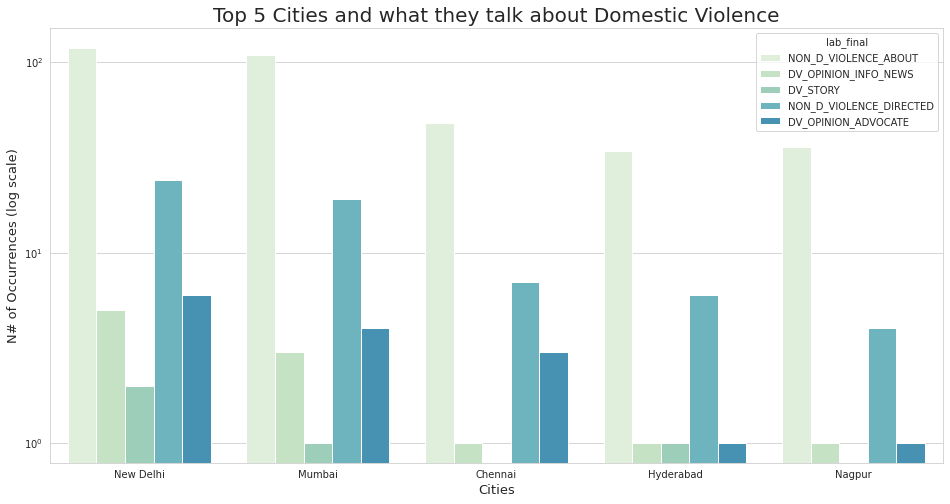

In [69]:
sns.set_style('whitegrid')
sns.set_palette('GnBu')
plt.figure(figsize=(16,8))
g = sns.countplot(x = 'india', data = labels_by_city,hue ='lab_final',
              order =labels_by_city['india'].value_counts().iloc[:5].index)
g.set_yscale('log')
g.set_title('Top 5 Cities and what they talk about Domestic Violence',fontsize = 20)
g.set_xlabel('Cities', fontsize = 13)
g.set_ylabel('N# of Occurrences (log scale)', fontsize = 13)
plt.show()

### Our Model

In [0]:
from sklearn.model_selection import train_test_split

In [71]:
df

,index,username,to,text,retweets,favorites,replies,id_x,permalink,author_id,formatted_date,hashtags,mentions,geo,urls,user_location,month,processed_text,label,annotations,annotation_approver,lab_final,tweet_id,india,pakistan,DV_OPINION_ADVOCATE,DV_OPINION_DENIER,DV_OPINION_INFO_NEWS,DV_OPINION_NEWS_INFO,DV_STORY,NON_D_VIOLENCE_ABOUT,NON_D_VIOLENCE_DIRECTED,NO_VIOLENCE,UNKNOWN
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-30,0,VipinHeartsTay,NaN,The fact their might be so many marital rape a...,0,10,1,1.255927e+18,https://twitter.com/VipinHeartsTay/status/1255...,2875165356,Thu Apr 30 18:28:25 +0000 2020,NaN,NaN,NaN,NaN,India,4,fact might many marital rape sexual assault wi...,DV,"[{'label': 24, 'user': 1}]",admin,DV_OPINION_ADVOCATE,NaN,Unknown,Unkown,1,0,0,0,0,0,0,0,0
2020-04-30,1,TheGhoudi,NaN,"‘If the child has been through sexual abuse, a...",2,3,1,1.255806e+18,https://twitter.com/TheGhoudi/status/125580574...,822838819359690754,Thu Apr 30 10:26:35 +0000 2020,NaN,@TanujaSodhi,NaN,NaN,"Mumbai, India",4,"‘if child sexual abuse, adults/parents give ch...",DV,"[{'label': 31, 'user': 6}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Mumbai,Panjgur Balochistan Pakistan,0,0,0,0,0,1,0,0,0
2020-04-30,2,TheGhoudi,NaN,‘If you have any doubt & pick up any signs of ...,0,6,1,1.255803e+18,https://twitter.com/TheGhoudi/status/125580265...,822838819359690754,Thu Apr 30 10:14:19 +0000 2020,#ChildrenAndCovid19,@Arpan_CSA,NaN,https://bit.ly/preventingCSA_lockdown,"Mumbai, India",4,"‘if doubt & pick sign sexual abuse child, make...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Mumbai,Karachi,0,0,0,0,0,1,0,0,0
2020-04-30,3,iamwanderlas,NaN,"FUCCBOIS 8/10: a great film and yeah, it talks...",0,2,1,1.255749e+18,https://twitter.com/iamwanderlas/status/125574...,849866014825209856,Thu Apr 30 06:42:54 +0000 2020,NaN,NaN,NaN,NaN,Lost,4,"fuccbois 8/10: great film yeah, talks politics...",DV,"[{'label': 31, 'user': 1}]",admin,NON_D_VIOLENCE_ABOUT,NaN,Mumbai,Karachi,0,0,0,0,0,1,0,0,0
2020-04-30,4,livevideohotcha,NaN,#Lockdown New Time Zone for #Sexual Couples......,0,2,2,1.255718e+18,https://twitter.com/livevideohotcha/status/125...,1228690520907689985,Thu Apr 30 04:36:16 +0000 2020,#Lockdown #Sexual,NaN,NaN,NaN,"Mumbai, India",4,#lockdown new time zone #sexual couples...,DV,"[{'label': 34, 'user': 1}]",admin,NO_VIOLENCE,NaN,New Delhi,Karachi,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-17,1254,hellionwolf,smolbean_kang,"Listen, your own issues with sexuality don't m...",0,0,1,NaN,https://twitter.com/hellionwolf/status/1261998...,2951225644,Sun May 17 12:34:32 +0000 2020,NaN,NaN,NaN,NaN,Ldn,5,"listen, issue sexuality mean get project. okay...",DV,"[{'label': 168, 'user': 18}]",admin,NO_VIOLENCE,1.261999e+18,NaN,NaN,0,0,0,0,0,0,0,1,0
2020-05-17,1255,AmnaHas96596596,PhilMitchell83,Intentionally denying that women make up major...,0,1,1,NaN,https://twitter.com/AmnaHas96596596/status/126...,1168675390887477250,Sun May 17 12:33:08 +0000 2020,NaN,NaN,NaN,NaN,"Karachi, Pakistan",5,intentionally deny woman make majority rape/se...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261998e+18,NaN,NaN,0,0,0,0,0,1,0,0,0
2020-05-17,1256,TheKailashRao,NaN,BJP leader @iSinghApurva said that the support...,2,2,0,NaN,https://twitter.com/TheKailashRao/status/12619...,1227687231663378432,Sun May 17 12:30:20 +0000 2020,#JusticeForApurva,@iSinghApurva,NaN,https://www.opindia.com/2020/05/bjp-youth-lead...,"Alwar, Rajasthan",5,bjp leader @isinghapurva say supporter opposit...,DV,"[{'label': 166, 'user': 18}]",admin,NON_D_VIOLENCE_ABOUT,1.261997e+18,NaN,NaN,0,0,0,0,0,1,0,0,0


In [0]:
df = df.reset_index()
df = df.drop(['index', 'username','to','id_x','permalink','annotation_approver','author_id','geo', 'tweet_id'], axis = 1)

In [0]:
df = df.fillna("Unknown")

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
   df['text'], df['lab_final'], test_size=0.33, random_state=42)

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
x_train_count = count_vectorizer.fit_transform(X_train)
x_train_count.shape

(4074, 10025)

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
x_train_tfidf = tfidf.fit_transform(x_train_count)
x_train_tfidf.shape


(4074, 10025)

In [0]:
from sklearn.pipeline import  Pipeline
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train_tfidf, y_train)
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

text_clf = text_clf.fit(X_train, y_train)

In [78]:
predictions = text_clf.predict(X_test)
predictions

array(['NON_D_VIOLENCE_ABOUT', 'NON_D_VIOLENCE_ABOUT',
       'NON_D_VIOLENCE_ABOUT', ..., 'NON_D_VIOLENCE_ABOUT',
       'NON_D_VIOLENCE_ABOUT', 'NO_VIOLENCE'], dtype='<U23')

In [79]:
from sklearn.metrics import f1_score, accuracy_score
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

f1 = f1_score(y_test,predictions,average='weighted')
print(f1)

0.7539840637450199
0.7022602693241646


In [80]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('cvec', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42))])
text_clf_svm = text_clf_svm.fit(X_train, y_train)
predictions_svm = text_clf_svm.predict(X_test)

f1_score_svm = f1_score(y_test, predictions_svm, average = 'weighted')
print(f'SVM score it is: {f1_score_svm}')

SVM score it is: 0.8071170716173823


In [81]:
sentence = 'The fact their might be so many marital rape and other sexual assaults within homes taking place right now with a greater rate, and no one wont be talking about it bcz CORONA.'
sample = text_clf_svm.predict([sentence])
sample

array(['NON_D_VIOLENCE_ABOUT'], dtype='<U23')

In [82]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.6.2)


In [83]:
X_train.shape, X_test.shape

((4074,), (2008,))

In [0]:
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from sklearn.feature_extraction.text import TfidfVectorizer
pipe = make_pipeline_imb(TfidfVectorizer(),
                         RandomOverSampler(),
                         MultinomialNB())

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

f1 = f1_score(y_test,y_pred,average='weighted')
print(f1)

0.8969123505976095
0.9008450272845882


In [89]:
print(classification_report_imbalanced(y_test, y_pred))

                               pre       rec       spe        f1       geo       iba       sup

    DV_OPINION_ADVOCATE       0.58      1.00      0.97      0.74      0.99      0.98        69
      DV_OPINION_DENIER       1.00      1.00      1.00      1.00      1.00      1.00         5
   DV_OPINION_INFO_NEWS       0.80      1.00      0.99      0.89      1.00      0.99        43
               DV_STORY       0.63      1.00      0.99      0.77      1.00      1.00        17
   NON_D_VIOLENCE_ABOUT       0.97      0.88      0.95      0.92      0.91      0.83      1222
NON_D_VIOLENCE_DIRECTED       0.75      0.93      0.97      0.83      0.95      0.90       204
            NO_VIOLENCE       0.92      0.91      0.98      0.91      0.94      0.88       443
                UNKNOWN       0.56      1.00      1.00      0.71      1.00      1.00         5

            avg / total       0.91      0.90      0.96      0.90      0.93      0.86      2008



In [88]:
sentence = 'The fact their might be so many marital rape and other sexual assaults within homes taking place right now with a greater rate, and no one wont be talking about it bcz CORONA.'
sample = pipe.predict([sentence])
sample

array(['DV_OPINION_ADVOCATE'], dtype='<U23')